/var/folders/hl/0r3fbld566g2q0_dh3lc7mcw0000gn/T/ipykernel_93703/2121918204.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


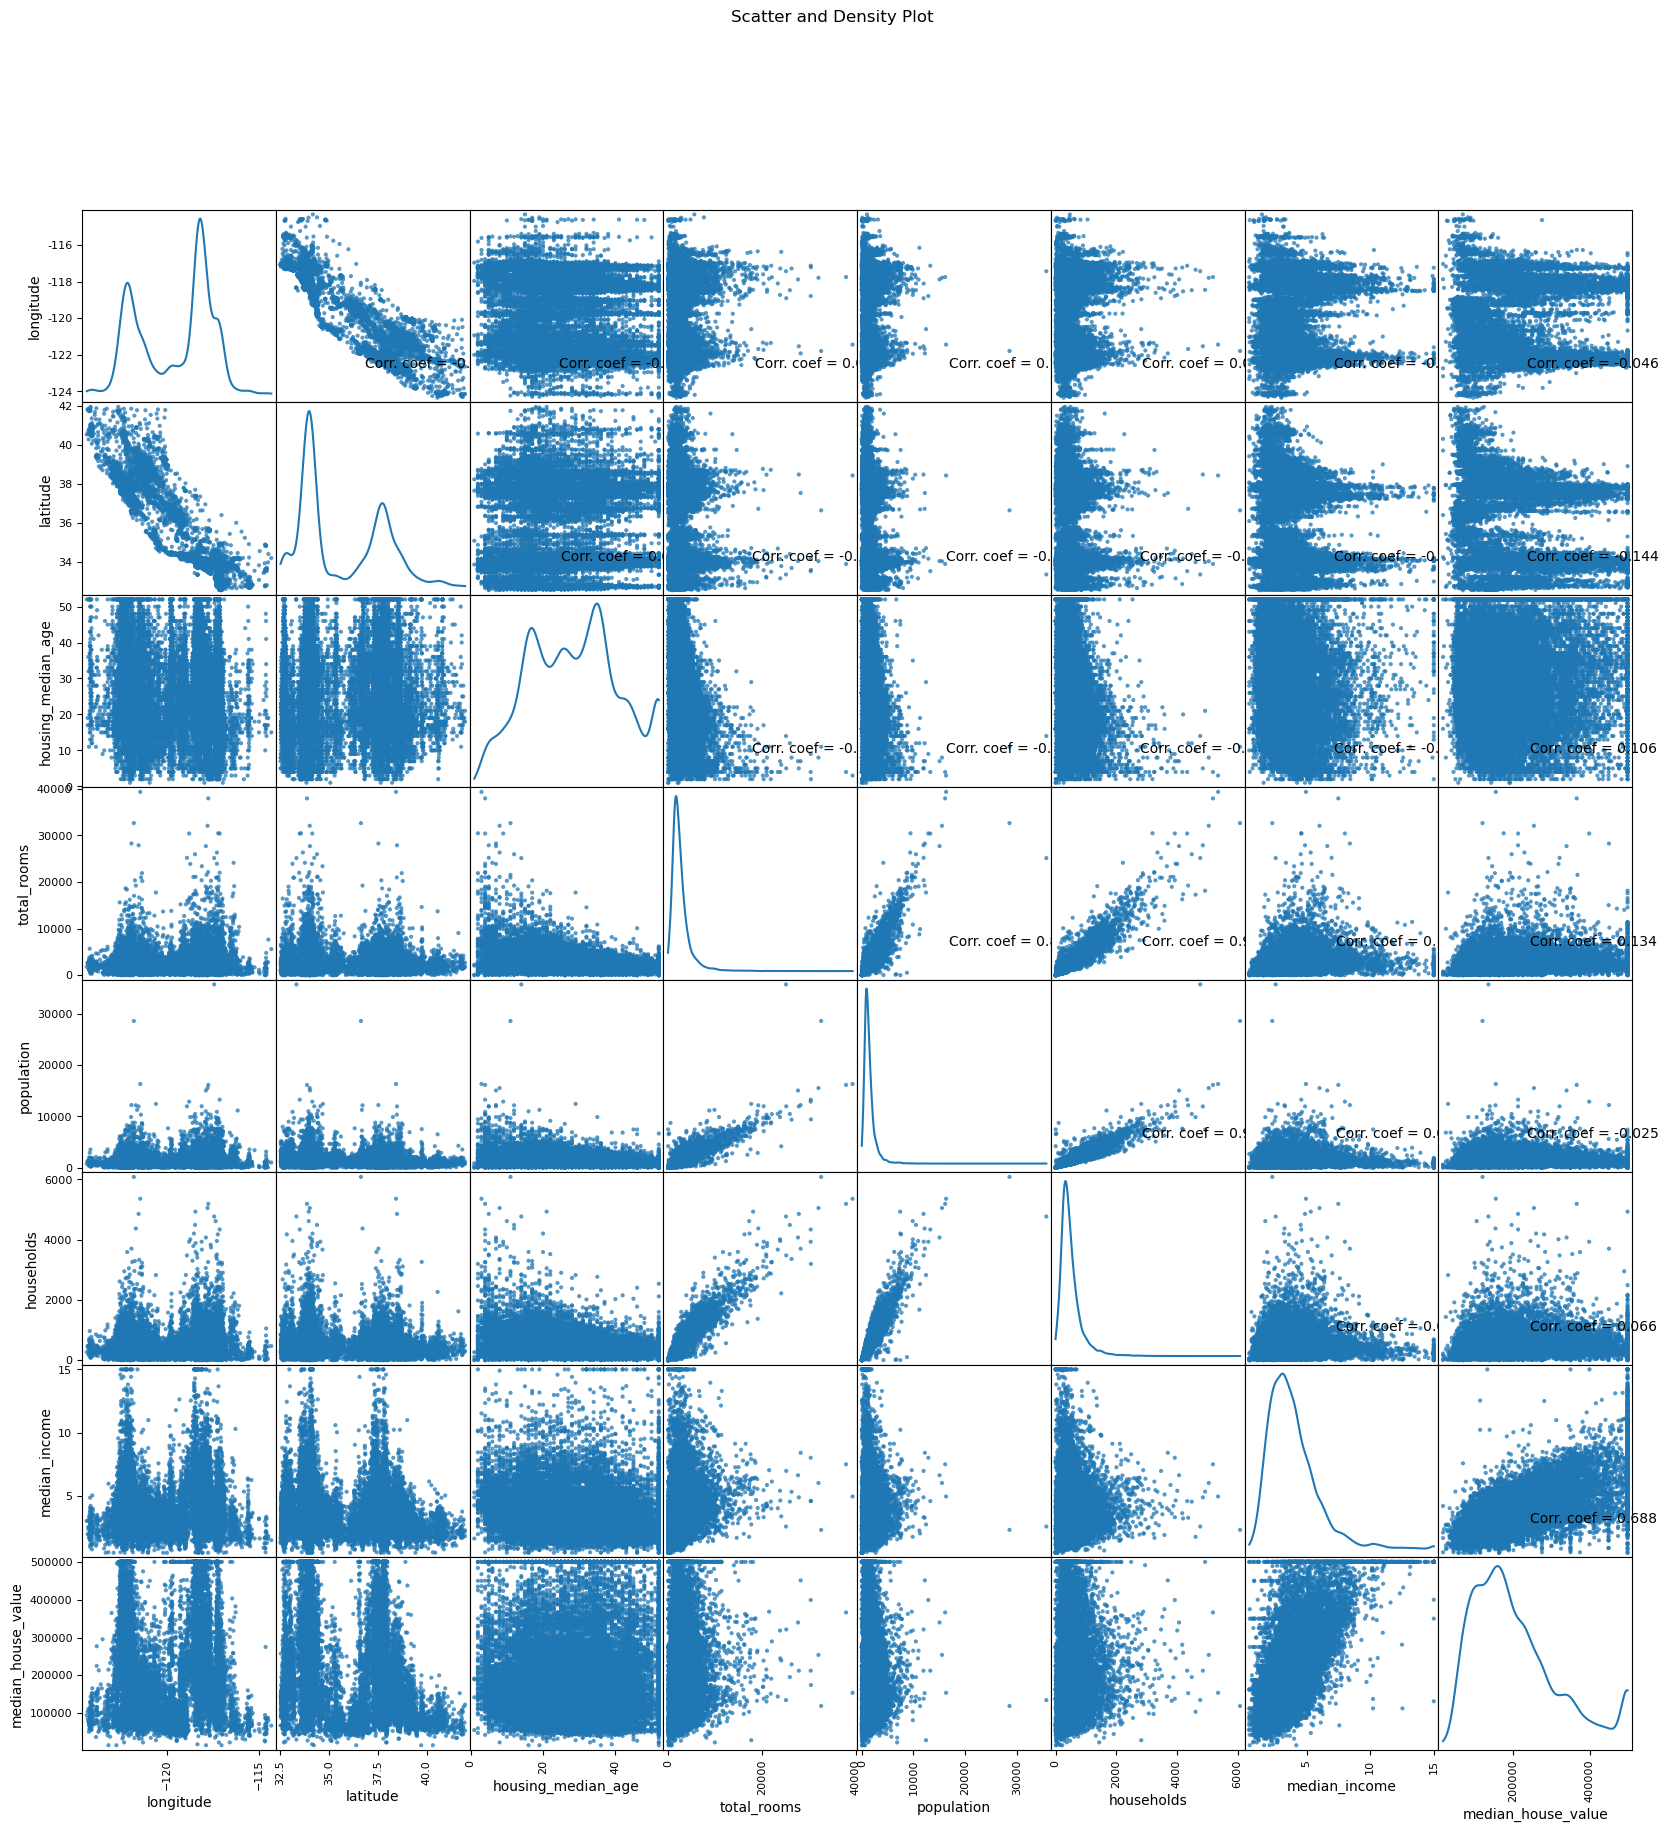

Data Shape


(20640, 10)


Missing Values: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Data Types: 
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+12, tolerance: 1.923e+10
  model = cd_fast.enet_coordinate_descent(


Linear Regression Model R² Score: 0.65379
Ridge Regression Model R² Score: 0.65379
Lasso Regression Model R² Score: 0.65379
Random Forest Regression Model R² Score: 0.83184
Polynomial Regression Model (Degree 2) R² Score: 0.64403
Polynomial Regression Model (Degree 3) R² Score: -0.03336

Polynomial Regression (Degree 2):
Mean Squared Error: 4745462732.99976
Coefficients: [-3.00009120e+09 -1.49429734e+08 -5.94354852e+07  7.50277201e+06
 -3.19812262e+07 -1.95785765e+07  5.56914021e+07 -1.51481863e+07
  8.74434492e+06  8.75926190e+06 -2.23531115e+07 -3.53491777e+06
  8.38442976e+06  4.13251056e+02  5.31507865e+03 -8.23941498e+02
  1.21483799e+01 -4.34845183e+01  7.84572778e+00 -4.14390764e+01
 -1.18861284e+04  3.00003363e+09  3.00003470e+09  2.65174542e+09
  2.99979045e+09  3.00002766e+09  2.56710172e+03 -9.65926228e+02
  1.32288304e+01 -6.13577571e+01  9.89827877e+00 -3.61682933e+01
 -1.24702442e+04  1.49921696e+08  1.49922348e+08 -7.48980570e+08
  1.49785486e+08  1.49921717e+08  1.59746

In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

#Read the dataset
df = pd.read_csv('housing.csv')
df.head()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 20, 10)


# Creating function to print info on the dataset
def inspect_data(df):
    print('Data Shape')
    print('\n')
    print(df.shape)
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    
inspect_data(df)

# One-hot encode the ocean_proximity column
one_hot_encoder = OneHotEncoder(sparse=False)
ocean_proximity_encoded = one_hot_encoder.fit_transform(df[['ocean_proximity']])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=one_hot_encoder.categories_[0])
df = pd.concat([df.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

# Fill missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize the models
lr = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)
rf = RandomForestRegressor(random_state=42)
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)

# Fit and predict with normal data
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)


X_train_poly_2 = poly_features_2.fit_transform(X_train)
X_test_poly_2 = poly_features_2.transform(X_test)
lr_poly_2 = LinearRegression()
lr_poly_2.fit(X_train_poly_2, y_train)

X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)
lr_poly_3 = LinearRegression()
lr_poly_3.fit(X_train_poly_3, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)

y_pred_lr_poly_2 = lr_poly_2.predict(X_test_poly_2)
y_pred_lr_poly_3 = lr_poly_3.predict(X_test_poly_3)

# Calculate R² scores
score_lr = r2_score(y_test, y_pred_lr)
score_ridge = r2_score(y_test, y_pred_ridge)
score_lasso = r2_score(y_test, y_pred_lasso)
score_rf = r2_score(y_test, y_pred_rf)

score_lr_poly_2 = r2_score(y_test, y_pred_lr_poly_2)
score_lr_poly_3 = r2_score(y_test, y_pred_lr_poly_3)

print(f'Linear Regression Model R² Score: {score_lr:.5f}')
print(f'Ridge Regression Model R² Score: {score_ridge:.5f}')
print(f'Lasso Regression Model R² Score: {score_lasso:.5f}')
print(f'Random Forest Regression Model R² Score: {score_rf:.5f}')
print(f'Polynomial Regression Model (Degree 2) R² Score: {score_lr_poly_2:.5f}')
print(f'Polynomial Regression Model (Degree 3) R² Score: {score_lr_poly_3:.5f}')

# Print MSE, coefficients, and intercepts
models = [('Linear Regression', lr), ('Ridge Regression', ridge), ('Lasso Regression', lasso), ('Random Forest Regression', rf), ('Polynomial Regression (Degree 2)', lr_poly_2), ('Polynomial Regression (Degree 3)', lr_poly_3)]
for name, model in models:
    if name.startswith("Polynomial Regression"):
        if "Degree 2" in name:
            X_test_poly = X_test_poly_2
        elif "Degree 3" in name:
            X_test_poly = X_test_poly_3
        else:
            X_test_poly = X_test

        print(f'\n{name}:')
        mse = mean_squared_error(y_test, model.predict(X_test_poly))
        print(f'Mean Squared Error: {mse:.5f}')
        if not name.startswith("Random Forest"):
            print(f'Coefficients: {model.coef_}')
            print(f'Intercept: {model.intercept_:.5f}')
        else:
            print("Feature importances: ", model.feature_importances_)


In [18]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
score_elastic_net = r2_score(y_test, y_pred_elastic_net)
print(f'Elastic Net Regression Model R² Score: {score_elastic_net:.5f}')

print('\nElastic Net Regression:')
mse_elastic_net = mean_squared_error(y_test, elastic_net.predict(X_test))
print(f'Mean Squared Error: {mse_elastic_net:.5f}')
print(f'Coefficients: {elastic_net.coef_}')
print(f'Intercept: {elastic_net.intercept_:.5f}')


Elastic Net Regression Model R² Score: 0.62475

Elastic Net Regression:
Mean Squared Error: 5063640312.02162
Coefficients: [-1.71370589e+04 -1.74442937e+04  1.28205759e+03 -2.36139140e+00
  3.79673501e+01 -4.65866736e+01  1.20518072e+02  3.72920937e+04
  8.50719791e+03 -1.93468558e+04  1.72012722e+02  3.68644559e+03
  6.97819963e+03]
Intercept: -1408763.63962


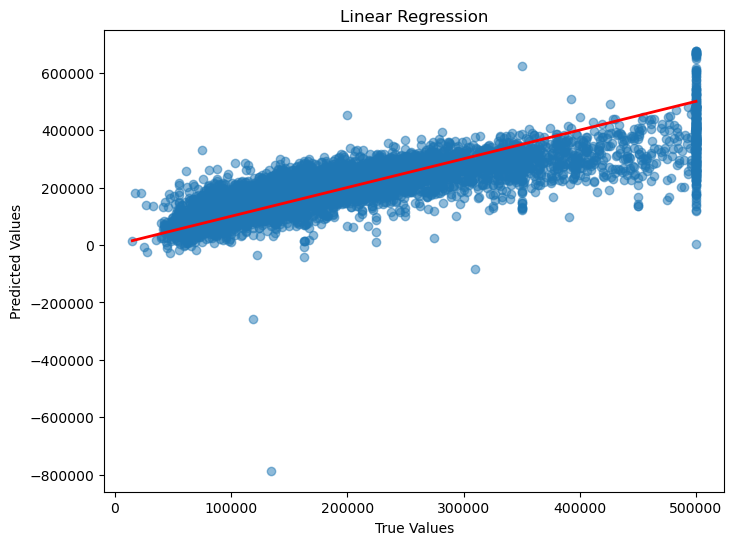

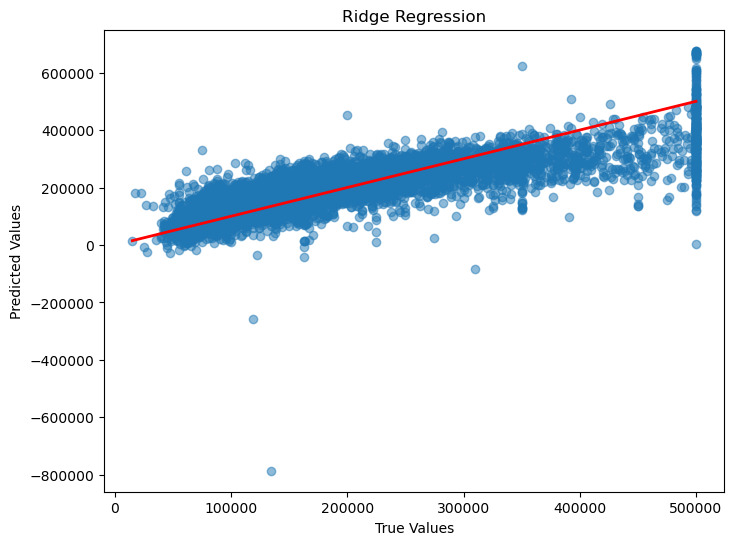

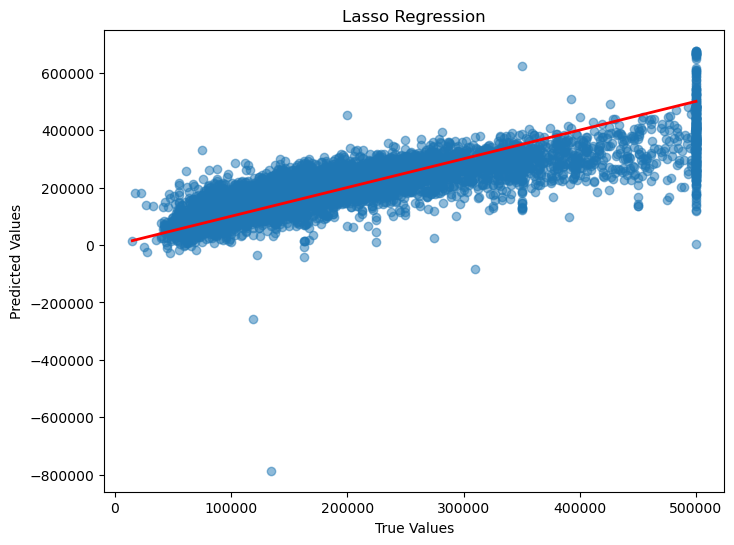

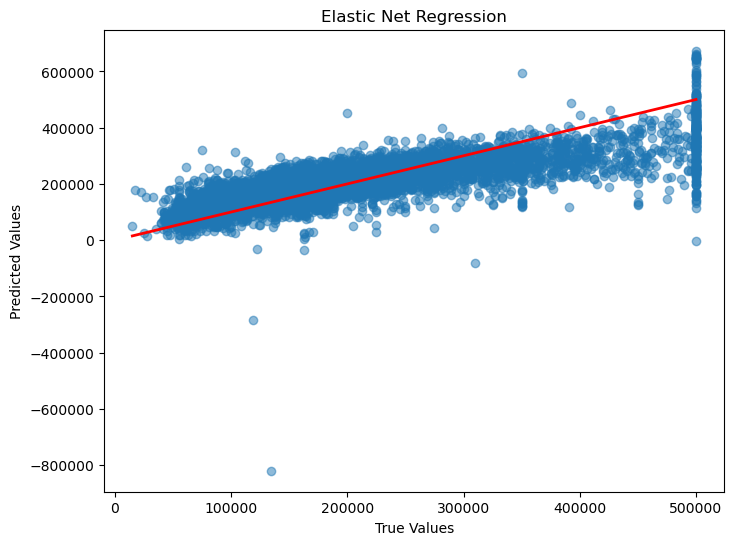

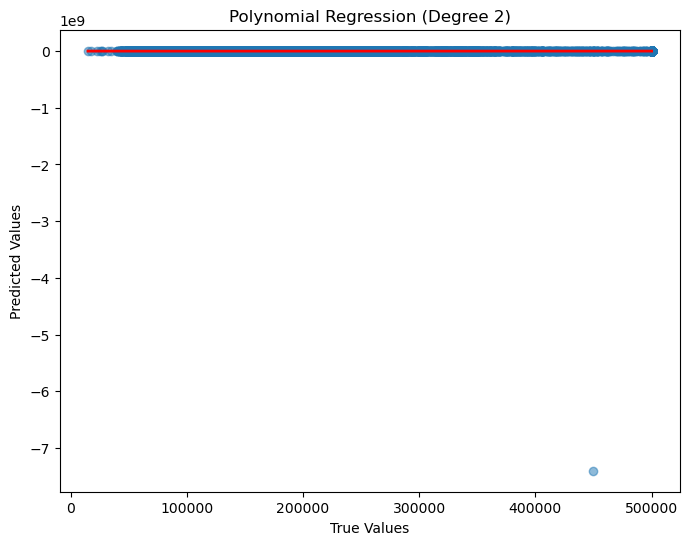

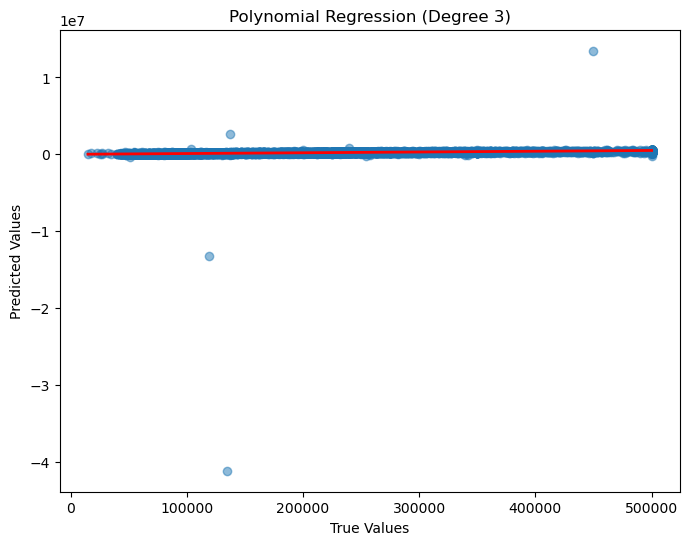

In [19]:
def plot_regression_results(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linewidth=2)
    plt.show()

plot_regression_results(y_test, y_pred_lr, 'Linear Regression')
plot_regression_results(y_test, y_pred_ridge, 'Ridge Regression')
plot_regression_results(y_test, y_pred_lasso, 'Lasso Regression')
plot_regression_results(y_test, y_pred_elastic_net, 'Elastic Net Regression')  # if Elastic Net is used
plot_regression_results(y_test, y_pred_lr_poly_2, 'Polynomial Regression (Degree 2)')
plot_regression_results(y_test, y_pred_lr_poly_3, 'Polynomial Regression (Degree 3)')


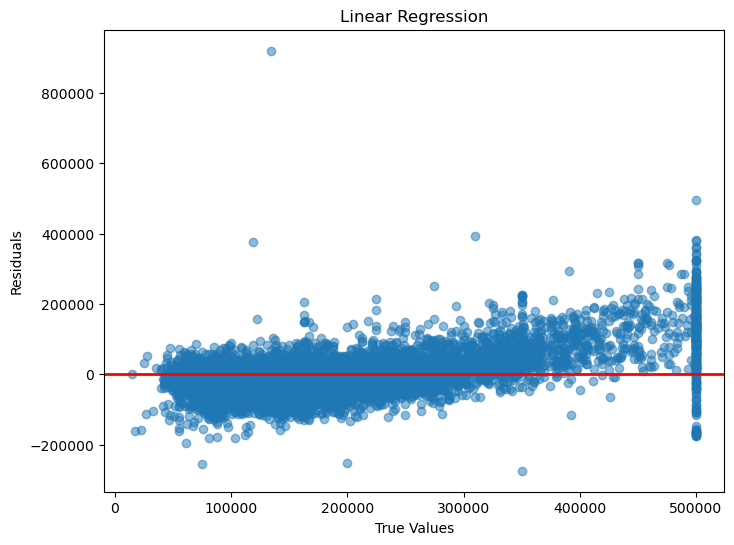

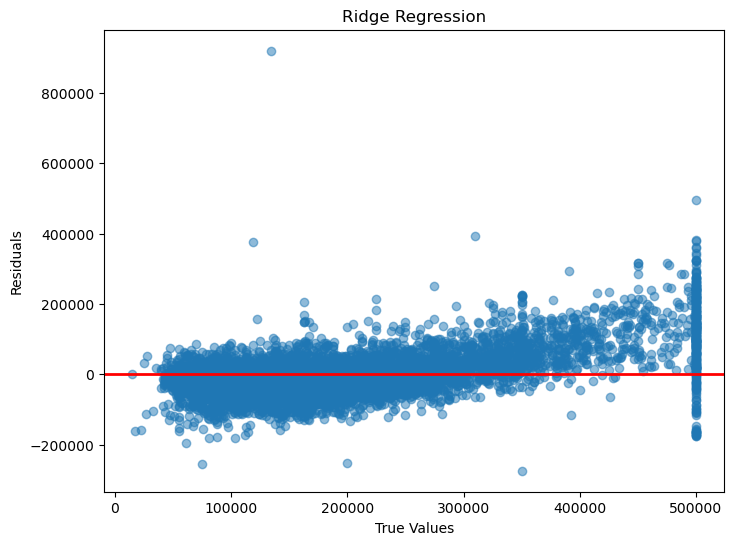

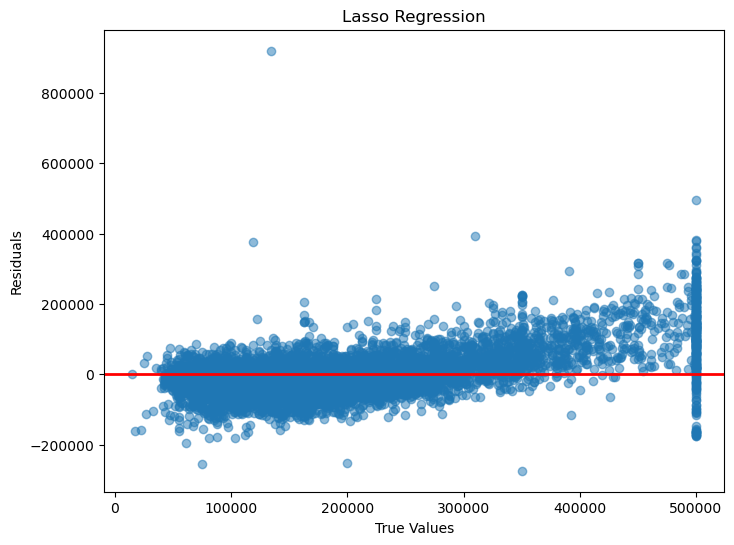

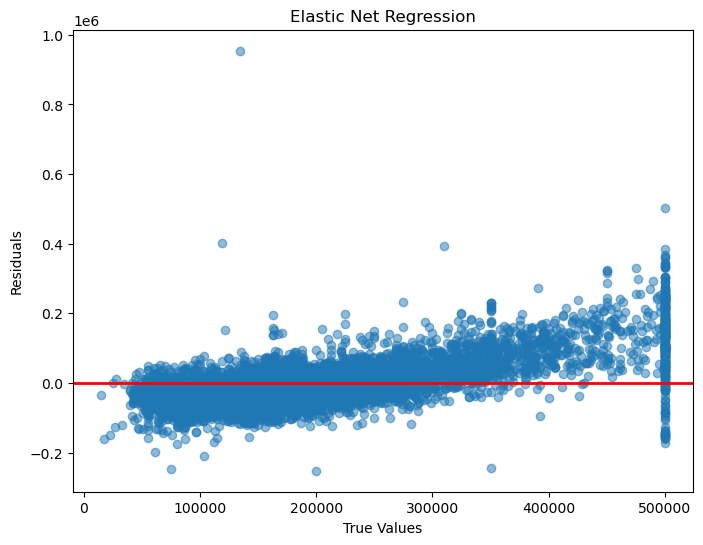

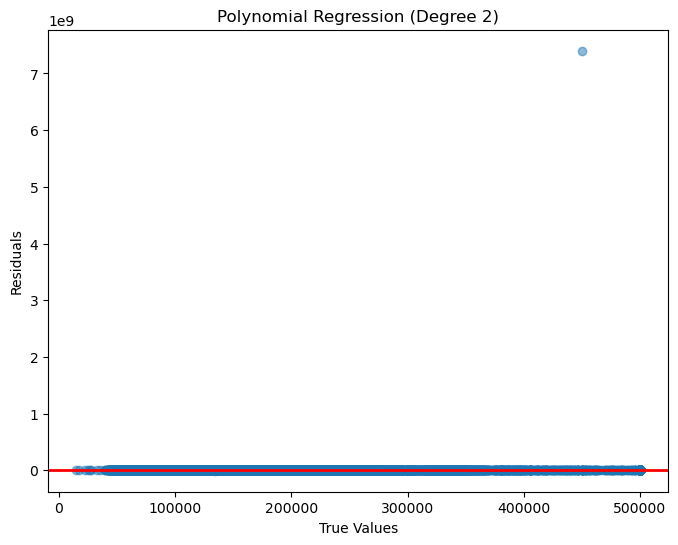

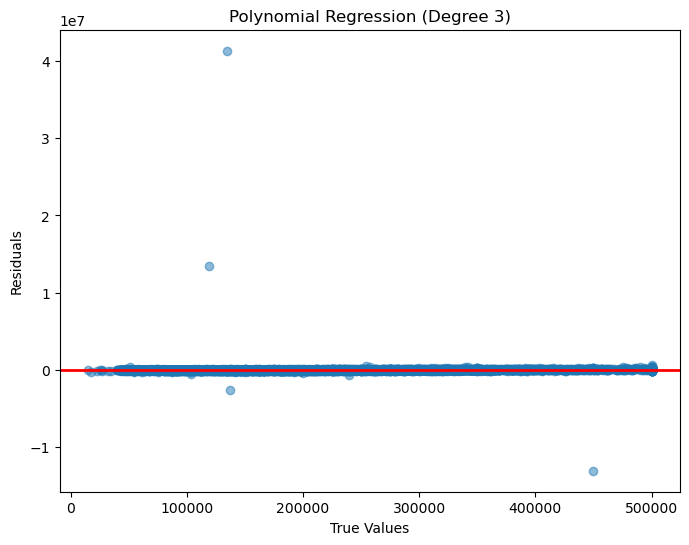

In [20]:
#plot the residuals (the difference between the true values and the predicted values) against the true values.


def plot_residuals(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    residuals = y_true - y_pred
    plt.scatter(y_true, residuals, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='red', linewidth=2)
    plt.show()
plot_residuals(y_test, y_pred_lr, 'Linear Regression')
plot_residuals(y_test, y_pred_ridge, 'Ridge Regression')
plot_residuals(y_test, y_pred_lasso, 'Lasso Regression')
plot_residuals(y_test, y_pred_elastic_net, 'Elastic Net Regression')  # if Elastic Net is used
plot_residuals(y_test, y_pred_lr_poly_2, 'Polynomial Regression (Degree 2)')
plot_residuals(y_test, y_pred_lr_poly_3, 'Polynomial Regression (Degree 3)')


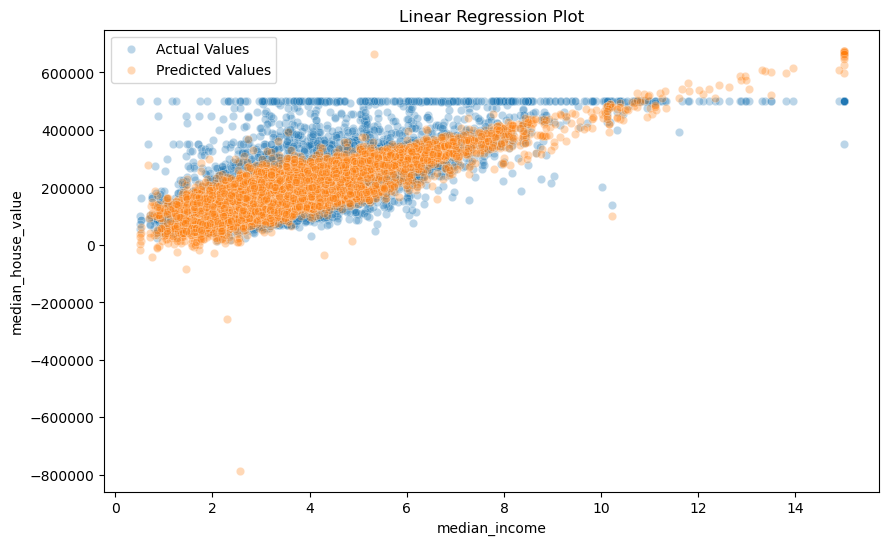

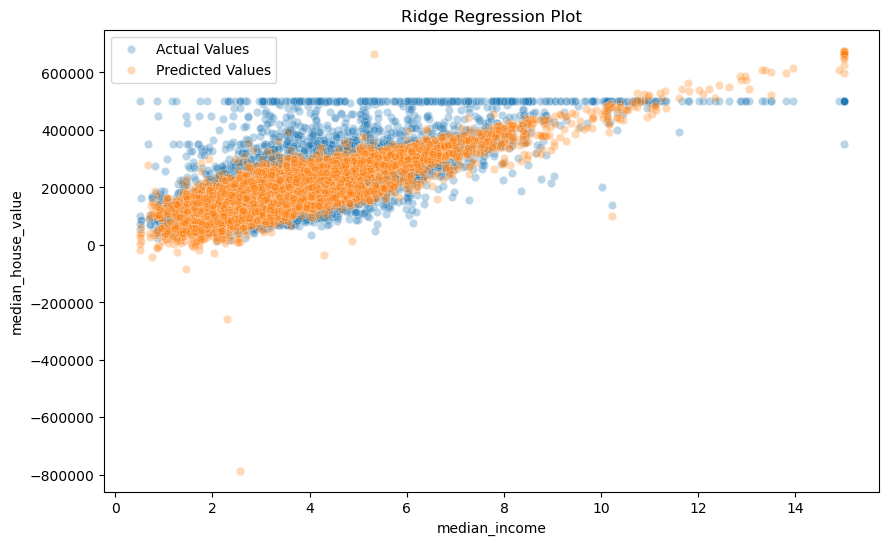

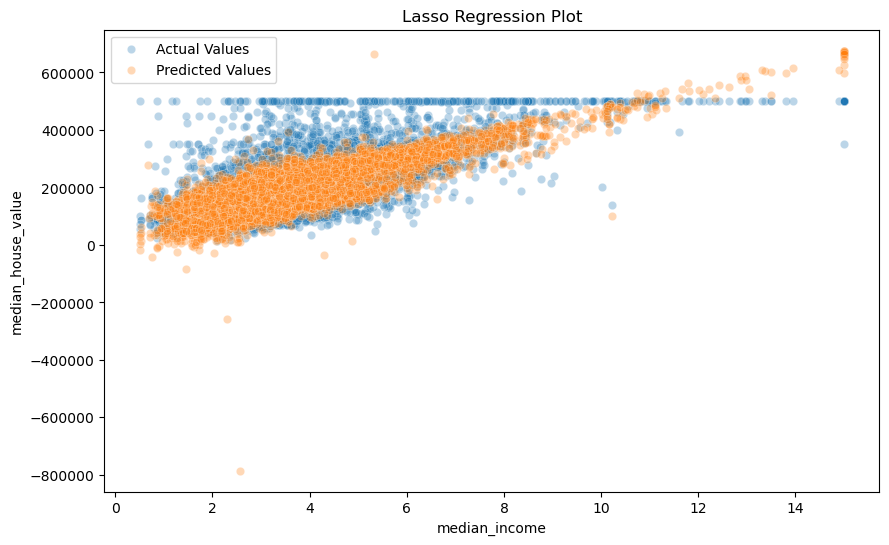

In [8]:
import seaborn as sns

def plot_regression(model, X_test, y_test, model_name, feature_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[feature_name], y=y_test, alpha=0.3, label='Actual Values')
    sns.scatterplot(x=X_test[feature_name], y=model.predict(X_test), alpha=0.3, label='Predicted Values')
    plt.title(f'{model_name} Regression Plot')
    plt.legend()
    plt.show()

# Feature to use for plotting
selected_feature = 'median_income'

# Plot Linear Regression
plot_regression(lr, X_test, y_test, 'Linear', selected_feature)

# Plot Ridge Regression
plot_regression(ridge, X_test, y_test, 'Ridge', selected_feature)

# Plot Lasso Regression
plot_regression(lasso, X_test, y_test, 'Lasso', selected_feature)


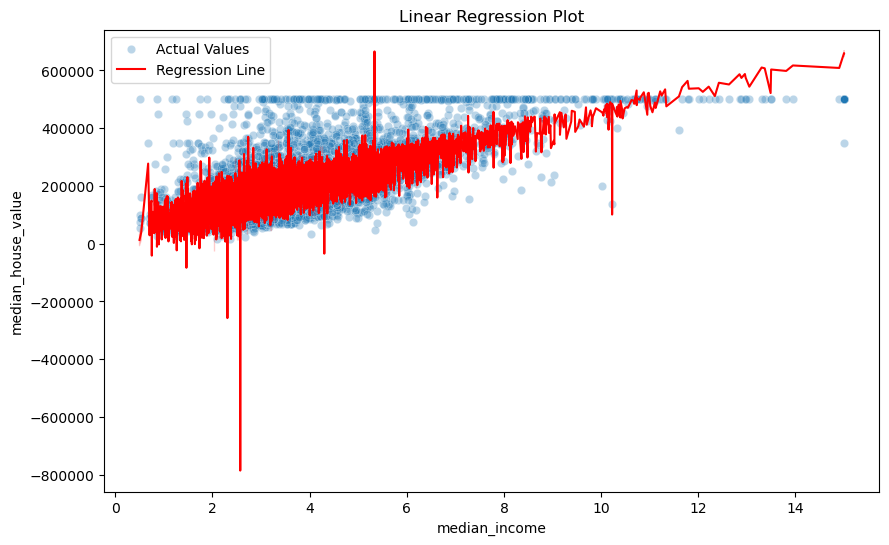

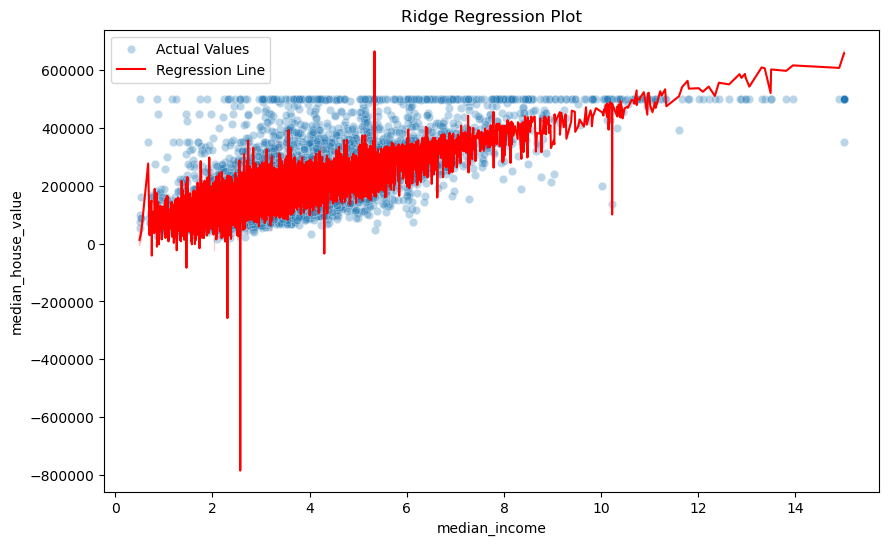

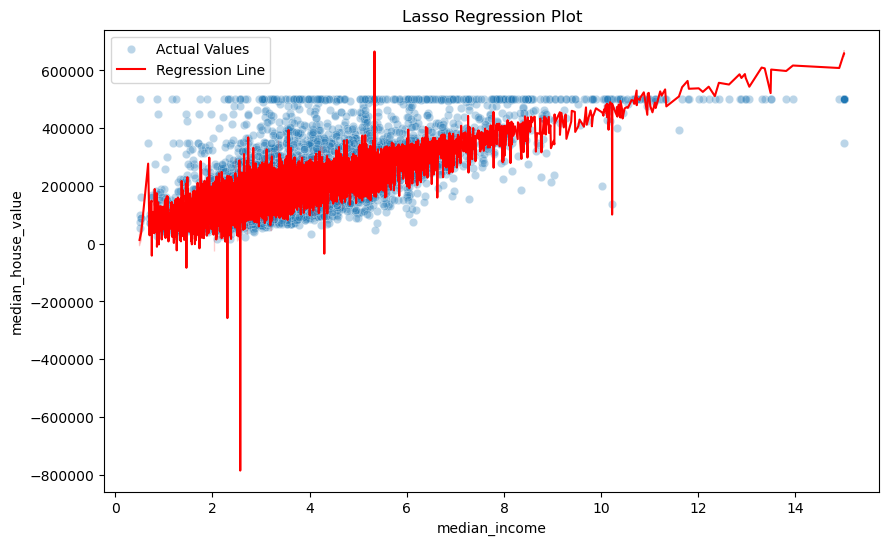

In [9]:
import seaborn as sns

def plot_regression(model, X_test, y_test, model_name, feature_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[feature_name], y=y_test, alpha=0.3, label='Actual Values')

    # Create a DataFrame with the feature and predicted values
    predictions_df = pd.DataFrame({feature_name: X_test[feature_name], 'Predicted Values': model.predict(X_test)})
    predictions_df = predictions_df.sort_values(by=feature_name)

    # Plot the regression line using Seaborn's lineplot
    sns.lineplot(x=predictions_df[feature_name], y=predictions_df['Predicted Values'], color='red', label='Regression Line')

    plt.title(f'{model_name} Regression Plot')
    plt.legend()
    plt.show()

# Feature to use for plotting
selected_feature = 'median_income'

# Plot Linear Regression
plot_regression(lr, X_test, y_test, 'Linear', selected_feature)

# Plot Ridge Regression
plot_regression(ridge, X_test, y_test, 'Ridge', selected_feature)

# Plot Lasso Regression
plot_regression(lasso, X_test, y_test, 'Lasso', selected_feature)


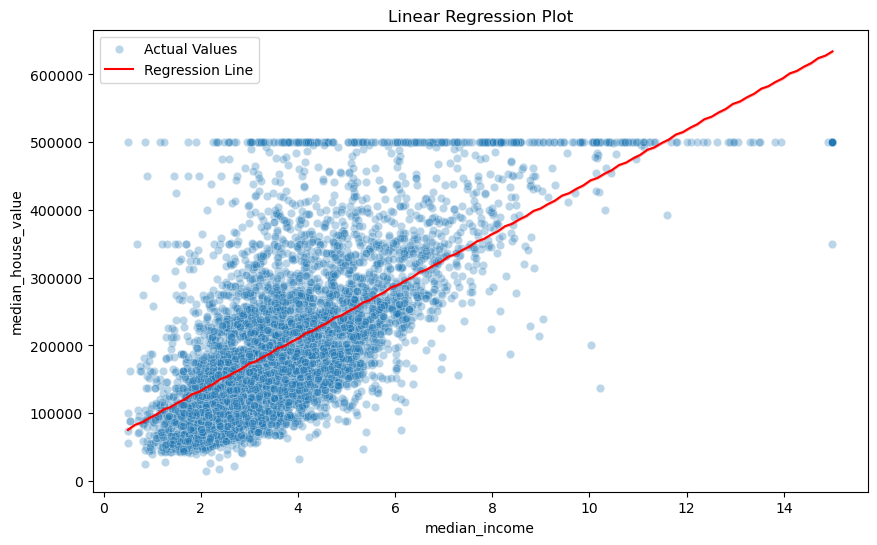

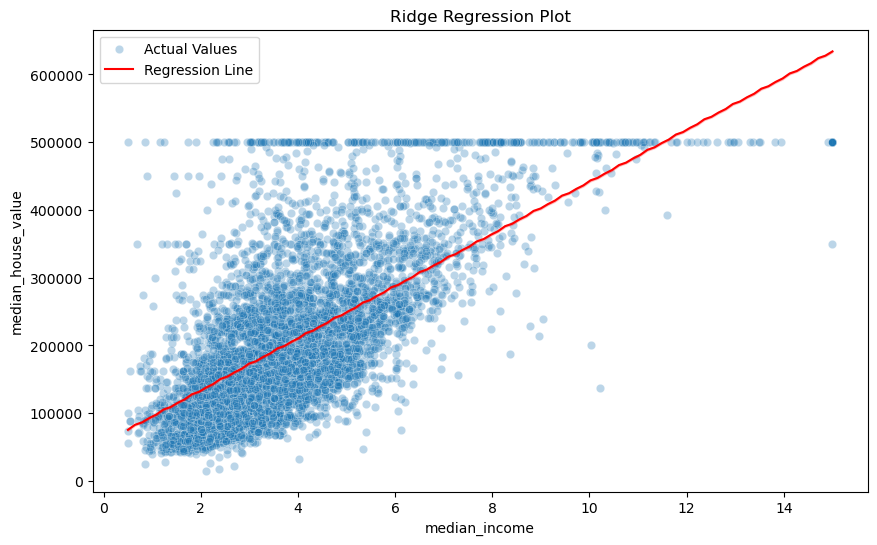

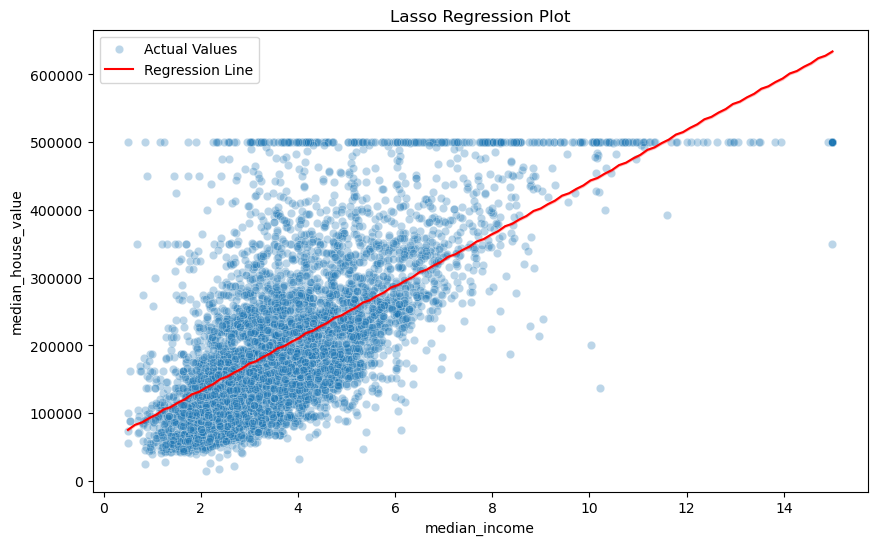

In [12]:
import seaborn as sns
import numpy as np

def plot_regression(model, X_test, y_test, model_name, feature_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[feature_name], y=y_test, alpha=0.3, label='Actual Values')

    # Create a grid of feature values spanning the range of the selected feature in the dataset
    x_grid = np.linspace(X_test[feature_name].min(), X_test[feature_name].max(), num=100)

    # Create a new DataFrame with the grid of feature values for each instance in the dataset
    X_grid = pd.concat([X_test] * len(x_grid), ignore_index=True)
    X_grid[feature_name] = np.tile(x_grid, len(X_test))

    # Predict the target variable using the grid of feature values and plot the regression line
    y_grid_pred = model.predict(X_grid)
    sns.lineplot(x=X_grid[feature_name], y=y_grid_pred, color='red', label='Regression Line')

    plt.title(f'{model_name} Regression Plot')
    plt.legend()
    plt.show()

# Feature to use for plotting
selected_feature = 'median_income'

# Plot Linear Regression
plot_regression(lr, X_test, y_test, 'Linear', selected_feature)

# Plot Ridge Regression
plot_regression(ridge, X_test, y_test, 'Ridge', selected_feature)

# Plot Lasso Regression
plot_regression(lasso, X_test, y_test, 'Lasso', selected_feature)
